In [34]:
# Notebook 2 - Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prompt_toolkit.shortcuts import yes_no_dialog

# For reproducibility
np.random.seed(42)
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [35]:
df = pd.read_csv(r"C:\Users\USER\PycharmProjects\DSGP-Component 2\data\component2_traffic_dataset.csv")  # replace if you saved another file
df.head()


,vehicle_id,depart_time,duration,waiting_time,waiting_count,route_length,time_loss,speed,travel_speed_kmh,hour_of_day,is_peak_hour,efficiency_score,congestion_ratio,vehicle_type,efficiency_score_from_perf,congestion_ratio_from_perf,is_peak_hour_from_perf,hourly_avg_waiting,hourly_avg_speed,hourly_avg_congestion,delay_ratio,productivity_score,efficiency_category
0,3,5.0,69.0,0.0,0,637.42,15.78,9.237971,33.256696,0.0,0,9.237971,0.000000,DEFAULT_VEHTYPE,9.237971,0.000000,0,212.359474,8.070935,0.257138,0.228696,637.420000,medium
1,10,15.0,60.0,10.0,1,414.60,23.78,6.910000,24.876000,0.0,0,6.910000,0.166667,DEFAULT_VEHTYPE,6.910000,0.166667,0,212.359474,8.070935,0.257138,0.396333,37.690909,medium
2,0,0.0,94.0,5.0,2,789.03,25.83,8.393936,30.218170,0.0,0,8.393936,0.053191,DEFAULT_VEHTYPE,8.393936,0.053191,0,212.359474,8.070935,0.257138,0.274787,131.505000,medium
3,32,48.0,62.0,14.0,1,478.15,28.45,7.712097,27.763548,0.0,0,7.712097,0.225806,DEFAULT_VEHTYPE,7.712097,0.225806,0,212.359474,8.070935,0.257138,0.458871,31.876667,medium
4,65,98.0,12.0,0.0,0,84.57,3.51,7.047500,25.371000,0.0,0,7.047500,0.000000,DEFAULT_VEHTYPE,7.047500,0.000000,0,212.359474,8.070935,0.257138,0.292500,84.570000,medium


In [36]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3988 entries, 0 to 3987
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   vehicle_id                  3988 non-null   int64  
 1   depart_time                 3988 non-null   float64
 2   duration                    3988 non-null   float64
 3   waiting_time                3988 non-null   float64
 4   waiting_count               3988 non-null   int64  
 5   route_length                3988 non-null   float64
 6   time_loss                   3988 non-null   float64
 7   speed                       3988 non-null   float64
 8   travel_speed_kmh            3988 non-null   float64
 9   hour_of_day                 3988 non-null   float64
 10  is_peak_hour                3988 non-null   int64  
 11  efficiency_score            3988 non-null   float64
 12  congestion_ratio            3988 non-null   float64
 13  vehicle_type                3988 

,vehicle_id,depart_time,duration,waiting_time,waiting_count,route_length,time_loss,speed,travel_speed_kmh,hour_of_day,is_peak_hour,efficiency_score,congestion_ratio,vehicle_type,efficiency_score_from_perf,congestion_ratio_from_perf,is_peak_hour_from_perf,hourly_avg_waiting,hourly_avg_speed,hourly_avg_congestion,delay_ratio,productivity_score,efficiency_category
count,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.0,3988.000000,3988.000000,3988,3988.000000,3988.000000,3988.0,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEFAULT_VEHTYPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,medium
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2219
mean,2083.945838,3129.522568,447.246740,229.173771,5.460632,2278.772856,285.885832,7.796404,28.067055,0.408475,0.0,7.796404,0.277161,NaN,7.796404,0.277161,0.0,229.173771,7.796404,0.277161,0.433470,322.930335,NaN
std,1268.853351,1904.308932,558.587127,487.375669,8.407493,1205.243482,532.202187,3.371211,12.136361,0.491614,0.0,3.371211,0.254815,NaN,3.371211,0.254815,0.0,20.236556,0.330407,0.024098,0.237796,659.592792,NaN
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,0.0,212.359474,7.398849,0.257138,0.055515,0.000000,NaN
25%,996.750000,1498.500000,157.000000,4.000000,1.000000,1265.460000,34.575000,5.905173,21.258621,0.000000,0.0,5.905173,0.029112,NaN,5.905173,0.029112,0.0,212.359474,7.398849,0.257138,0.222137,14.792234,NaN
50%,2018.500000,3034.000000,282.000000,62.000000,3.000000,2213.455000,107.765000,8.057918,29.008504,0.000000,0.0,8.057918,0.241470,NaN,8.057918,0.241470,0.0,212.359474,8.070935,0.257138,0.415250,34.234680,NaN
75%,3086.250000,4632.500000,461.000000,166.000000,6.000000,3227.437500,232.755000,10.018416,36.066297,1.000000,0.0,10.018416,0.414492,NaN,10.018416,0.414492,0.0,253.523020,8.070935,0.306156,0.577903,245.116786,NaN


In [37]:
columns_to_drop = ['vehicle_id', 'waiting_count', 'speed', 'hour_of_day', 'is_peak_hour', 'efficiency_score', 'vehicle_type', 'congestion_ratio_from_perf','is_peak_hour_from_perf','hourly_avg_waiting', 'hourly_avg_speed', 'hourly_avg_congestion', 'productivity_score']  
df = df.drop(columns=columns_to_drop, errors='ignore')


In [38]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]


Series([], dtype: int64)

In [39]:
num_cols = df.select_dtypes(include=['float64','int64']).columns
cat_cols = df.select_dtypes(include=['object','category']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna('missing')


In [40]:
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [41]:
df.dtypes

depart_time                   float64
duration                      float64
waiting_time                  float64
route_length                  float64
time_loss                     float64
travel_speed_kmh              float64
congestion_ratio              float64
efficiency_score_from_perf    float64
delay_ratio                   float64
efficiency_category            object
dtype: object

In [43]:
# Negative speed or position
if 'travel_speed_kmh' in df.columns:
    df = df[df['travel_speed_kmh'] >= 0]

if 'pos' in df.columns:
    df = df[df['pos'] >= 0]

# Extreme outliers (optional)
# df = df[df['acc'] < 10]  # if acceleration > 10 m/s² is unrealistic


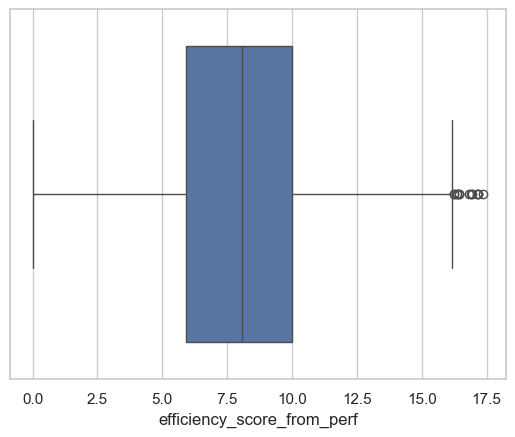

In [44]:
sns.boxplot(x=df['efficiency_score_from_perf'])
plt.show()

In [45]:
Q1 = df['efficiency_score_from_perf'].quantile(0.25)
Q3 = df['efficiency_score_from_perf'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)


Lower bound: -0.2646924032186826
Upper bound: 16.188280674133523


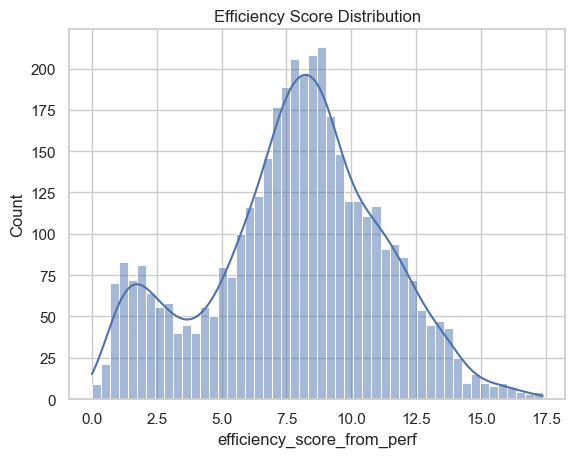

In [46]:
sns.histplot(df['efficiency_score_from_perf'], bins=50, kde=True)
plt.title("Efficiency Score Distribution")
plt.show()

In [47]:
lower_percentile = df['efficiency_score_from_perf'].quantile(0.01)  # 1st percentile
upper_percentile = df['efficiency_score_from_perf'].quantile(0.99)  # 99th percentile

print("Lower bound:", lower_percentile)
print("Upper bound:", upper_percentile)


Lower bound: 0.7417257878738167
Upper bound: 15.098747933743173


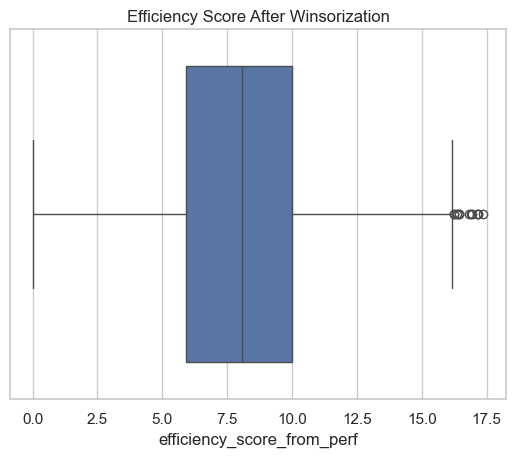

In [48]:
sns.boxplot(x=df['efficiency_score_from_perf'])
plt.title("Efficiency Score After Winsorization")
plt.show()

In [49]:
df['efficiency_score_from_perf'] = df['efficiency_score_from_perf'].clip(
    lower=0.7417257878738167, 
    upper=15.098747933743173
)


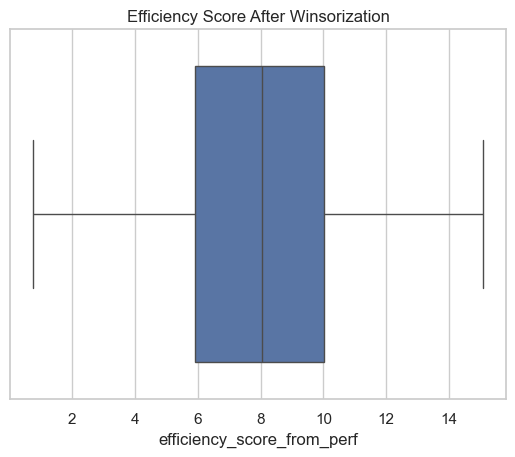

In [50]:
sns.boxplot(x=df['efficiency_score_from_perf'])
plt.title("Efficiency Score After Winsorization")
plt.show()

In [51]:
df.isna().sum()


depart_time                   0
duration                      0
waiting_time                  0
route_length                  0
time_loss                     0
travel_speed_kmh              0
congestion_ratio              0
efficiency_score_from_perf    0
delay_ratio                   0
efficiency_category           0
dtype: int64

In [52]:
df = df.drop_duplicates()


In [53]:
# Bin depart_time into 15-second intervals
bin_size = 15
df['depart_time_bin'] = (df['depart_time'] // bin_size).astype(int)


In [56]:
df.to_csv("../data/processed_clean.csv", index=False)
print("Preprocessing complete. File saved.")


Preprocessing complete. File saved.
